In [ ]:
#%config Completer.use_jedi = False

# Contatori Acqua

In [ ]:
#!pip install pandas

In [ ]:
#pip install numba

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
#from numba import jit, cuda
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##df = pd.read_csv('/home/nicola/Documenti/Floid/time_series_analysis/data_cum.csv')
df = pd.read_csv('/home/nicola/Documenti/DeepLearning/data_cum.csv')
#df = pd.read_csv('data_cum.csv')

In [ ]:
len(df)

40427

In [ ]:
df.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.187,0.025.1,0.004.10,0.0.188,0.0.189,0.0.190,0.0.191,0.0.192,0.004.11,0.0.193
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001,0.000,0.000,0.001,0.000,0.0,0.001,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.002,0.051,0.041,0.005,0.0,0.000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0


In [ ]:
np.sum(df.isnull().sum())

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.rename(columns={'0.0.193':'Target'}, inplace=True)

In [ ]:
df.Target

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
40422    0.0
40423    0.0
40424    0.0
40425    2.0
40426    0.0
Name: Target, Length: 40427, dtype: float64

In [ ]:
df['Target'] = df['Target'].astype(int)
occur = df.groupby(['Target']).size()

# display occurrences of combined columns
display(occur)

Target
0    30743
1     3565
2     5511
3      608
dtype: int64

<Axes: ylabel='Target'>

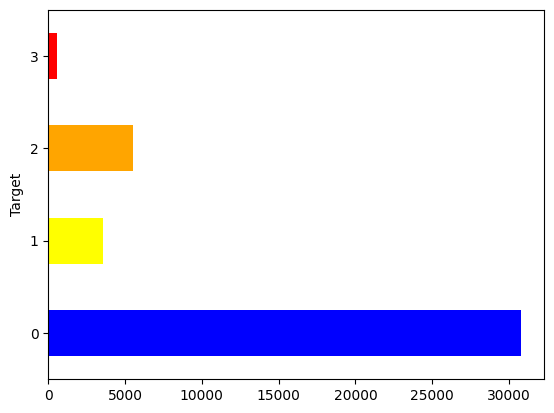

In [ ]:
occur.plot.barh(stacked=True, color = [ 'blue','yellow','orange', 'red'])
#Dataset Sbilanciato

#Comprensione della variabile Target

* perdita grave    🔴
* perdita moderata 🟠
* perdita lieve    🟡
* nessuna perdita  🔵

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# check if it needs standard scaler
list_max = []
list_min = []

for i in range(0,len(X)):
  max_ = np.max(X.iloc[i,:])
  min_ = np.min(X.iloc[i,:])
  list_max.append(max_)
  list_min.append(min_)
  # if max_ > 1:
  #   print(max)
  # if min_ < 0:
  #   print(min)

In [ ]:
print("Dataset max value: ",np.max(list_max))
print("\nDataset min value: ",np.max(list_min))

Dataset max value:  0.223

Dataset min value:  0.056


In [ ]:
dict_data = {}
dict_data = { "base" : (X,y)}

# Oversampling + Undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#https://towardsdatascience.com/smote-fdce2f605729

Dim X :  40427


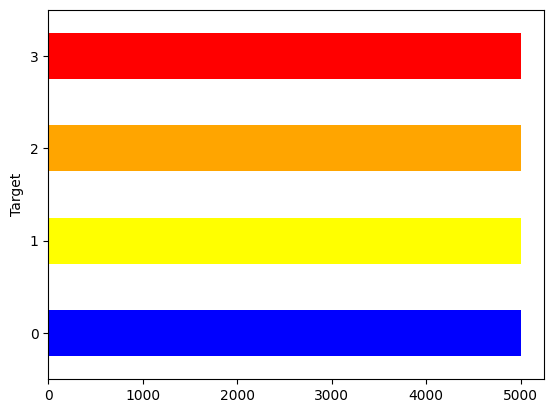

In [ ]:
strategy = {0:5000, 1:5000, 2:5000, 3:5000}

over = SMOTE()
under = RandomUnderSampler(sampling_strategy=strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)


X_smote, y_smote = pipeline.fit_resample(X, y)
print("Dim X : ",len(X))

X_smote['Target'] = y_smote
occur = X_smote.groupby(['Target']).size()
occur.plot.barh(stacked=True, color = [ 'blue','yellow','orange', 'red'])
X_smote.drop('Target',axis=1,inplace=True)

In [ ]:
dict_data["smote"] = (X_smote,y_smote)

# Posso combinare gli iperparametri in modo diverso

* Posso applicare o meno SMOTE al dataset (nel nostro caso abbiamo un dataset non bilanciato) (X,y) | (X_smote, y_smote)

* Posso applicare o meno un filtro Moving Average che va a ridurre il numero di punti delle serie temporali: (X_mv,y) | (X_smote,y_smote)


In [ ]:
X.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.186,0.0.187,0.025.1,0.004.10,0.0.188,0.0.189,0.0.190,0.0.191,0.0.192,0.004.11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001,0.000,0.000,0.001,0.000,0.0,0.001,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.002,0.051,0.041,0.005,0.0,0.000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0


In [ ]:
X.describe()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.186,0.0.187,0.025.1,0.004.10,0.0.188,0.0.189,0.0.190,0.0.191,0.0.192,0.004.11
count,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,...,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000
mean,0.000776,0.000735,0.000720,0.000689,0.000658,0.000623,0.000600,0.000580,0.000555,0.000530,...,0.001060,0.001118,0.001099,0.001080,0.001005,0.000989,0.000946,0.000924,0.000863,0.000868
std,0.003285,0.003173,0.003197,0.003028,0.002959,0.002850,0.002757,0.002691,0.002661,0.002586,...,0.003938,0.004599,0.004774,0.004722,0.003926,0.003802,0.003691,0.003577,0.003461,0.003474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.087000,0.091000,0.086000,0.088000,0.088000,0.088000,0.087000,0.087000,0.088000,0.086000,...,0.106000,0.120000,0.128000,0.123000,0.094000,0.091000,0.105000,0.086000,0.087000,0.088000


In [ ]:
import tensorflow as tf

2023-06-19 10:50:06.379137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 10:50:06.816798: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-19 10:50:07.036137: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-19 10:50:08.007159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

#Moving average
* applico moving average con window = 2, step = 2, al dataset per ridurre il numero di colonne

In [ ]:
#@jit(target_backend='cuda')
def moving_average(X):
  mv2 = X.iloc[1,:].rolling(window=2,step=2).mean()
  mv2 = mv2.dropna()
  X_mv = pd.DataFrame(columns=mv2.index)
  for i in range(0,len(X)):
    mv = X.iloc[i,:].rolling(window=2,step=2).mean()
    mv = mv.dropna()
    add = pd.DataFrame(np.reshape(mv.values,newshape=(1,X_mv.shape[1])), columns=mv.index)
   #X_mv = X_mv.append(mv)
    X_mv = pd.concat([X_mv, add], ignore_index=True)
  return X_mv

In [ ]:
dict_data.keys()

dict_keys(['base', 'smote'])

In [ ]:
list_X = []
list_y = []
list_k = []

with tf.device('/GPU:0'):
  for k in dict_data:
    X,y = dict_data[k]
    X_mv = moving_average(X)
    list_X.append(X_mv)
    list_y.append(y)
    list_k.append(k)
  #dictionary changed size during iteration
  #2 minute execute

2023-06-13 01:28:48.762046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 01:28:49.032914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 01:28:49.033006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-13 01:28:49.036860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [ ]:
for i in range(len(list_X)):
  s = "mv_"+list_k[i]
  dict_data[s] = (list_X[i],list_y[i])

In [ ]:
dict_data.keys()

dict_keys(['base', 'smote', 'mv_base', 'mv_smote'])

<Axes: >

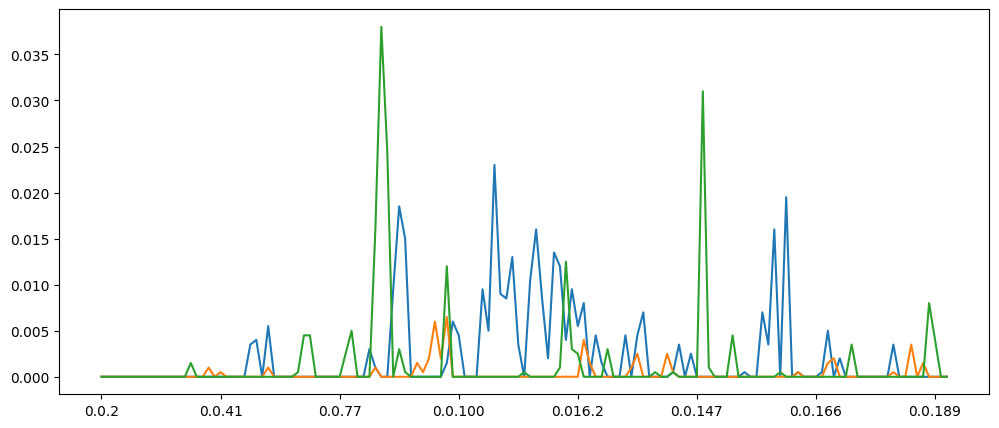

In [ ]:
dict_data['mv_base'][0].iloc[1,:].plot(figsize=(12,5))
dict_data['mv_base'][0].iloc[34,:].plot(figsize=(12,5))
dict_data['mv_base'][0].iloc[234,:].plot(figsize=(12,5))

In [ ]:
#!pip install statsmodels

# Controllo se le serie sono stazionarie

In [ ]:
#Time series are stationary if they do not have trend or seasonal effects
#Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.

#Augmented Dickey fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
from numpy.random import uniform

In [ ]:
indexes =  uniform(low = 0, high= len(X), size=(10,)).astype(int)
for i in indexes :
  adf_test(X.iloc[i,:])
  print('\n')

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.093941e+01
p-value                 9.378530e-20
# lags used             0.000000e+00
# observations          2.860000e+02
critical value (1%)    -3.453423e+00
critical value (5%)    -2.871699e+00
critical value (10%)   -2.572183e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: 
ADF test statistic     -6.788702e+00
p-value                 2.395202e-09
# lags used             2.000000e+00
# observations          2.840000e+02
critical value (1%)    -3.453587e+00
critical value (5%)    -2.871771e+00
critical value (10%)   -2.572222e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: 
ADF test statistic       -4.712164
p-value                   0.000080
# lags used               7.000000
# observations          279.000000
critical value (1%)    

# Modelli di Machine Learning :

* CNN
* RNN -> LSTM

In [ ]:
#!pip install scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dropout,Flatten,Dense,BatchNormalization,LSTM, Bidirectional
from sklearn.preprocessing import StandardScaler
from tensorflow.python.client import device_lib
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# import matplotlib.pyplot as plt

# def plot_loss(history,model,x):
#   plt.plot(history.history['loss'], label='train_loss_'+model+"_"+x)
#   plt.plot(history.history['val_loss'], label='val_loss_'+model+"_"+x)
#   plt.ylim([0, 1])
#   #plt.xlim([0, 100])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error [MPG]')
#   plt.legend()
#   plt.grid(True)
#   plt.show()
#   #plt.savefig(model+'_'+x+'.pdf')
#   # plotta anche le altre metriche

In [ ]:
# history model
# metric = loss, accuracy , ..
# model = conv or lstm
# x = type of dataset
# optimezer = Adam, SGD, RMSProp ...
# c1,c2 = colors
# path_dir_plot

def plot_metric(history, metric, model,x,optimizer, c1,c2, path_dir_plot):
  plt.plot(history.history[metric], label='train'+'_'+model+"_"+x, color=c1)
  plt.plot(history.history['val_'+metric], label='val'+'_'+model+"_"+x, color=c2)
  plt.ylim([0, 1])
  #plt.xlim([0, 100])
  plt.xlabel('Epoch')
  #plt.ylabel('Error [MPG]')
  plt.ylabel(metric)
  plt.legend()
  plt.grid(True)
  plt.savefig(path_dir_plot+metric+'_'+model+'_'+x+'_'+optimizer+'.pdf')
  plt.show()


In [ ]:
print(tf. __version__)

2.10.1


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-06-19 10:50:33.787458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-19 10:50:34.036381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-19 10:50:34.036510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
def create_model(input_shape,nb_classes, mtype, metrics, opt):#ottimizzatore, metrica come parametri
  if mtype == "Conv":
    model = keras.models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(input_shape, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    # model.add(Conv1D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
    # model.add(Conv1D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu'))
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(nb_classes,activation='softmax'))
    #model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=metrics)

    #models['Conv'].append(model)
    return model

  elif mtype == "LSTM":
    #recurrent_dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state
    model = Sequential()
    # model.add(Bidirectional(LSTM(128, return_sequences=True),input_shape= (input_shape,1)))
    # model.add(Bidirectional(LSTM(64,recurrent_dropout=0.2, return_sequences=True)))
    # model.add(Bidirectional(LSTM(32,recurrent_dropout=0.2,return_sequences=False)))
    model.add(LSTM(64,input_shape = (input_shape,1),recurrent_dropout=0.1, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(nb_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=metrics)

    #models['LSTM'].append(model)
    return model

  else:
     return 0

In [ ]:
#!nvcc -V









Execute model: Conv


Version of X: base


Dimension of X:  (40427, 287)


Lenght of y:  40427


Optimizer : Adam_clipping


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_180 (Conv1D)         (None, 144, 64)           256       
                                                                 
 conv1d_181 (Conv1D)         (None, 72, 64)            12352     
                                                                 
 max_pooling1d_90 (MaxPoolin  (None, 36, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_182 (Conv1D)         (None, 18, 128)           24704     
                                                                 
 conv1d_183 (Conv1D)         (None, 9, 128)            49280     
                                                    

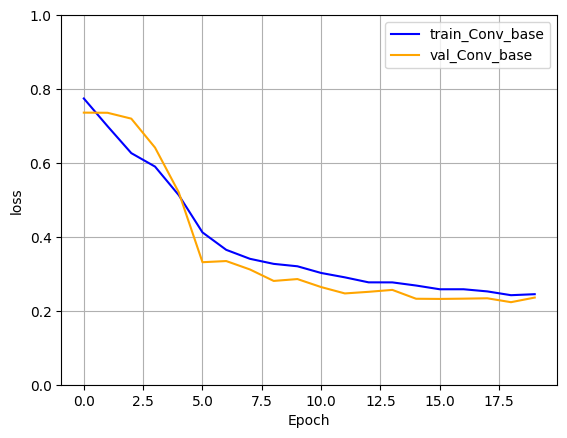

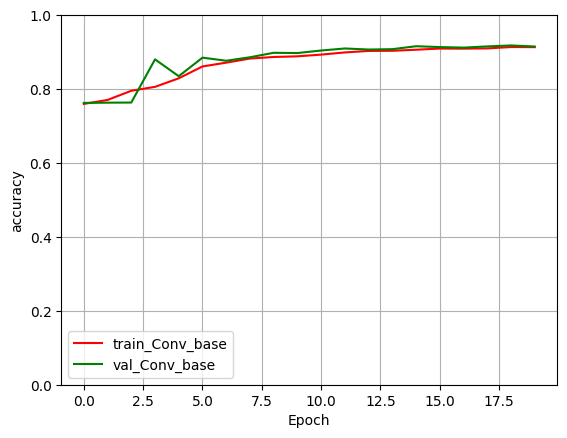

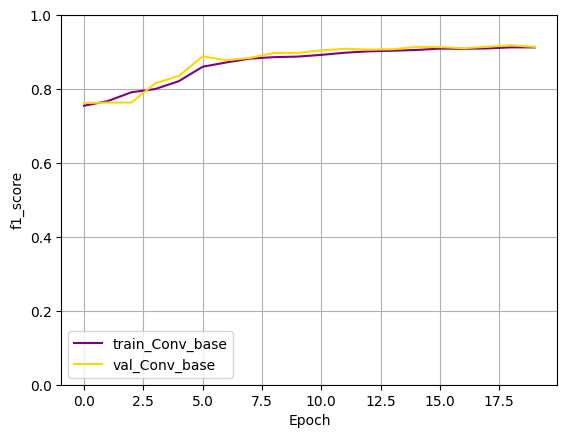

Optimizer : Adam


Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_184 (Conv1D)         (None, 144, 64)           256       
                                                                 
 conv1d_185 (Conv1D)         (None, 72, 64)            12352     
                                                                 
 max_pooling1d_92 (MaxPoolin  (None, 36, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_186 (Conv1D)         (None, 18, 128)           24704     
                                                                 
 conv1d_187 (Conv1D)         (None, 9, 128)            49280     
                                                                 
 max_pooling1d_93 (MaxPoolin  (None, 4, 128)           0         
 g1D)                             

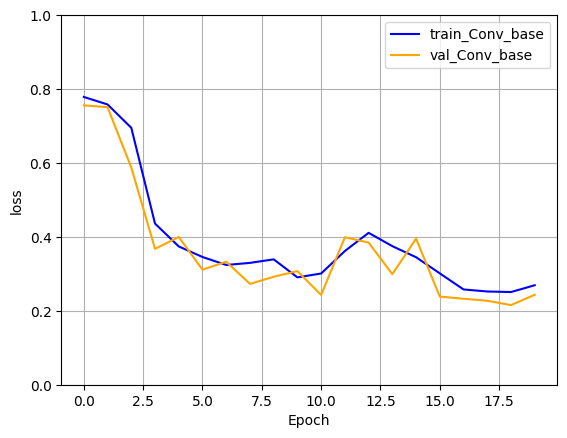

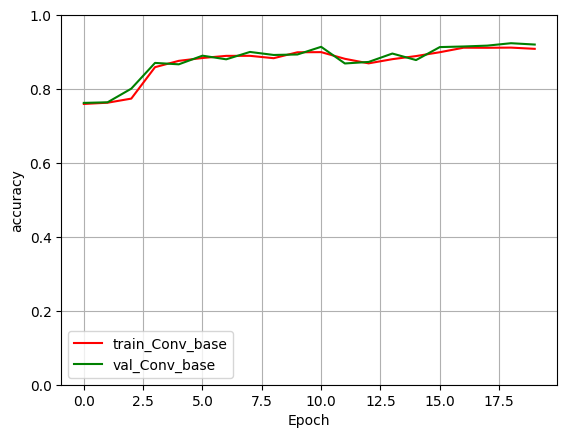

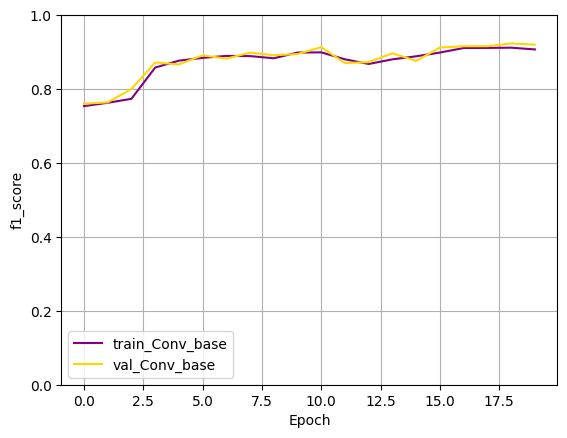









Execute model: LSTM


Version of X: base


Dimension of X:  (40427, 287)


Lenght of y:  40427


Optimizer : Adam_clipping


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 287, 64)           16896     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_108 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1693/1693 [==============================] - 330s 194ms/step - loss: 0.7607 - accuracy: 0.7600 - f1_score: 0.7584 - val_loss: 0.7576 - val_accuracy: 0.7611 - val_f1

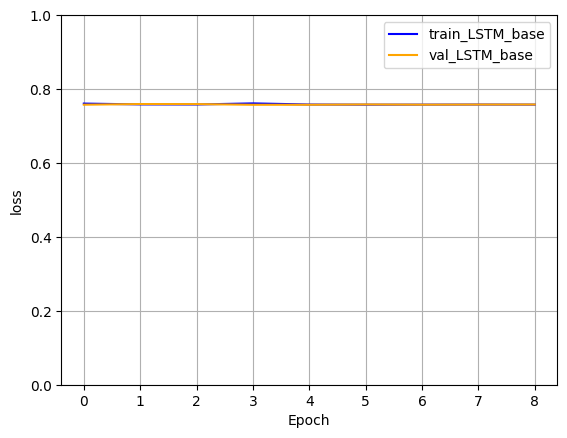

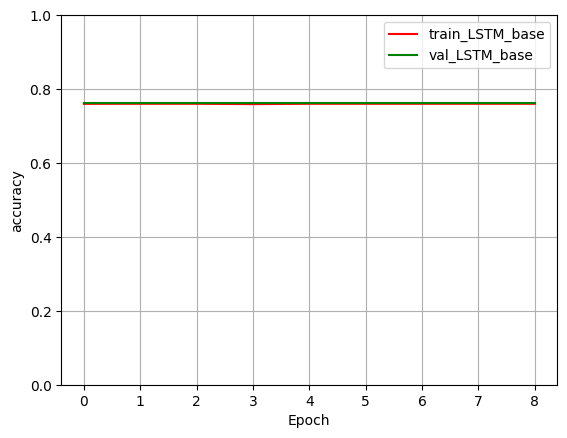

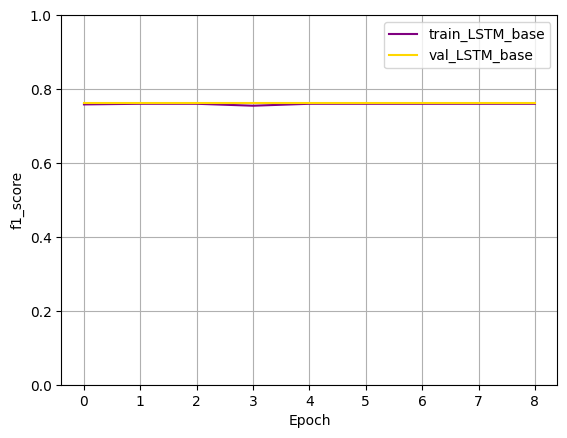

Optimizer : Adam


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 287, 64)           16896     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_109 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1693/1693 [==============================] - 327s 192ms/step - loss: 0.7615 - accuracy: 0.7599 - f1_score: 0.7582 - val_loss: 0.7614 - val_accuracy: 0.7611 - val_f1_score: 0.7611
Epoch 2/20
1693/1693 [==============================] - 328s 194ms/step - loss: 0.7585 - accuracy: 

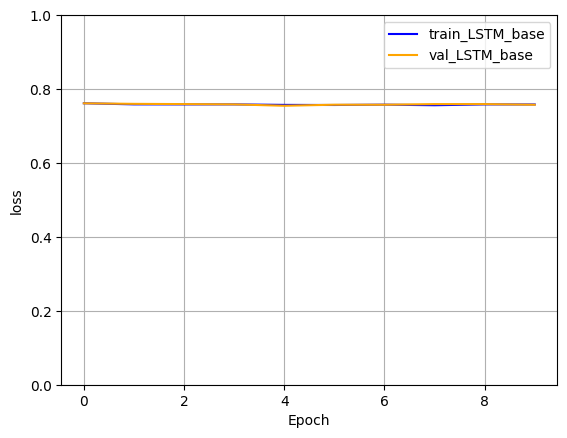

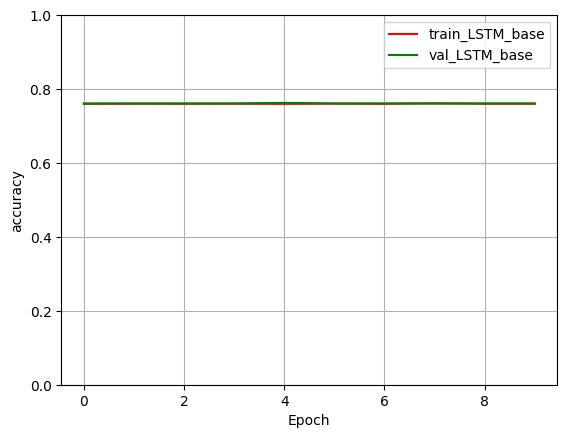

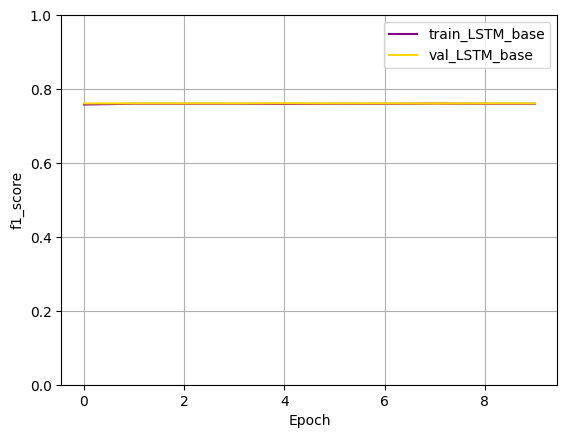









Execute model: Conv


Version of X: smote


Dimension of X:  (20000, 287)


Lenght of y:  20000


Optimizer : Adam_clipping


Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_188 (Conv1D)         (None, 144, 64)           256       
                                                                 
 conv1d_189 (Conv1D)         (None, 72, 64)            12352     
                                                                 
 max_pooling1d_94 (MaxPoolin  (None, 36, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_190 (Conv1D)         (None, 18, 128)           24704     
                                                                 
 conv1d_191 (Conv1D)         (None, 9, 128)            49280     
                                                   

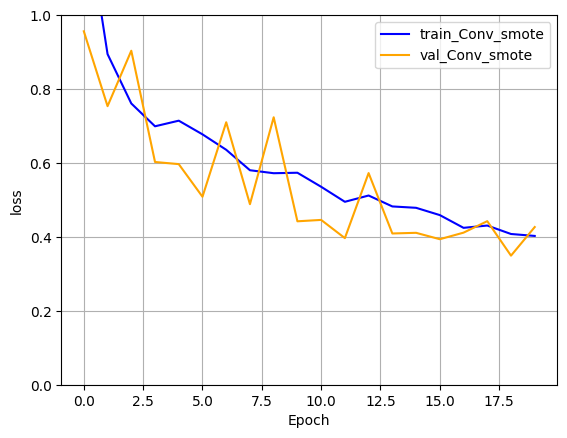

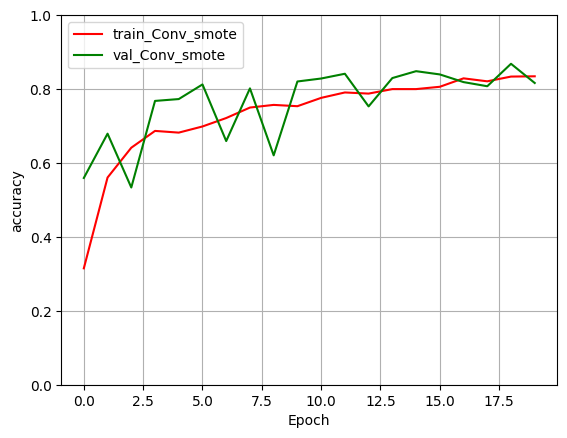

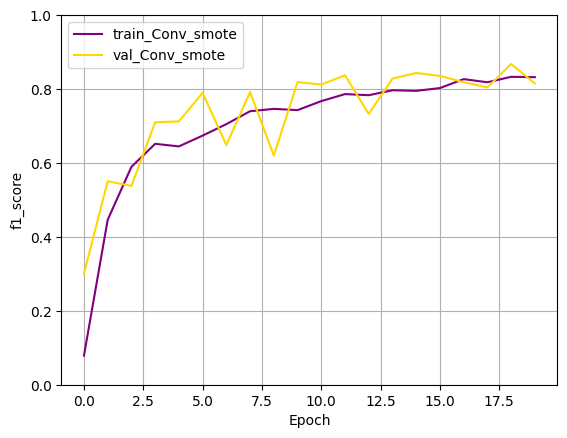

Optimizer : Adam


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_192 (Conv1D)         (None, 144, 64)           256       
                                                                 
 conv1d_193 (Conv1D)         (None, 72, 64)            12352     
                                                                 
 max_pooling1d_96 (MaxPoolin  (None, 36, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_194 (Conv1D)         (None, 18, 128)           24704     
                                                                 
 conv1d_195 (Conv1D)         (None, 9, 128)            49280     
                                                                 
 max_pooling1d_97 (MaxPoolin  (None, 4, 128)           0         
 g1D)                             

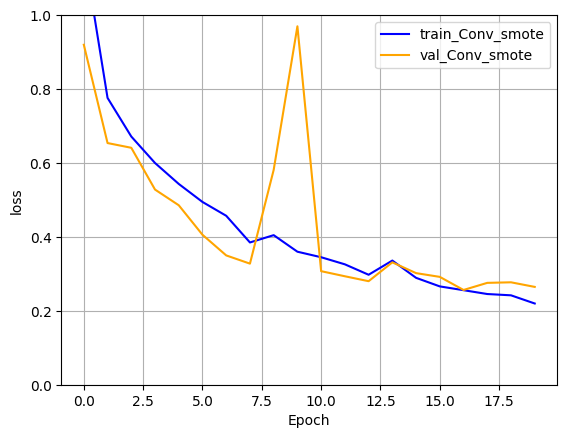

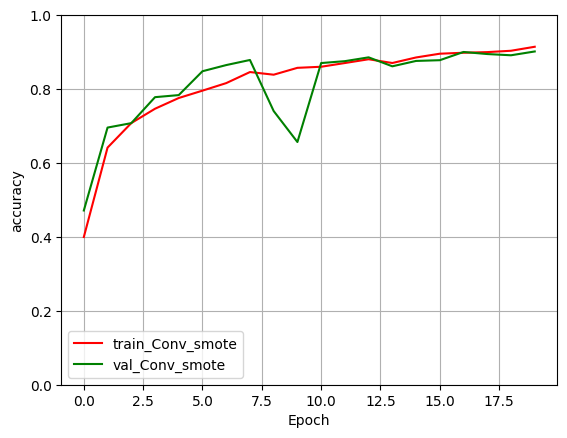

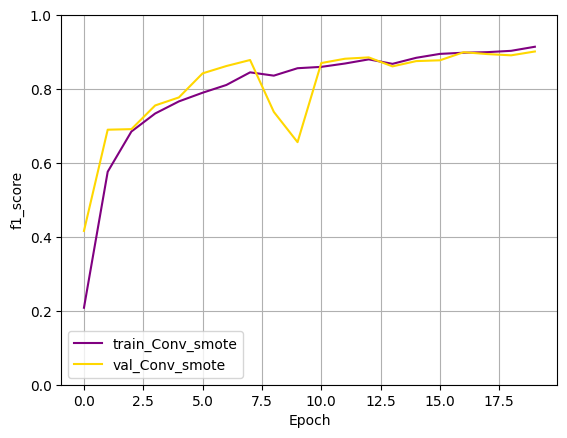









Execute model: LSTM


Version of X: smote


Dimension of X:  (20000, 287)


Lenght of y:  20000


Optimizer : Adam_clipping


Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 287, 64)           16896     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_114 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
838/838 [==============================] - 163s 193ms/step - loss: 1.3864 - accuracy: 0.2598 - f1_score: 0.0047 - val_loss: 1.3853 - val_accuracy: 0.2521 - val_f1_

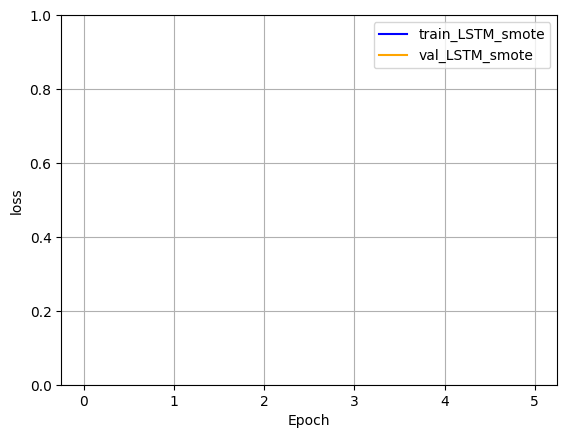

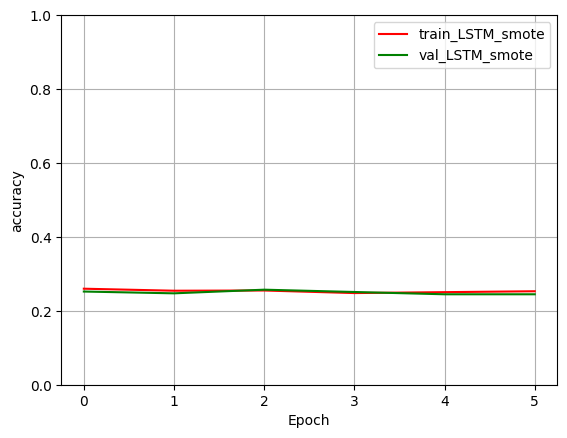

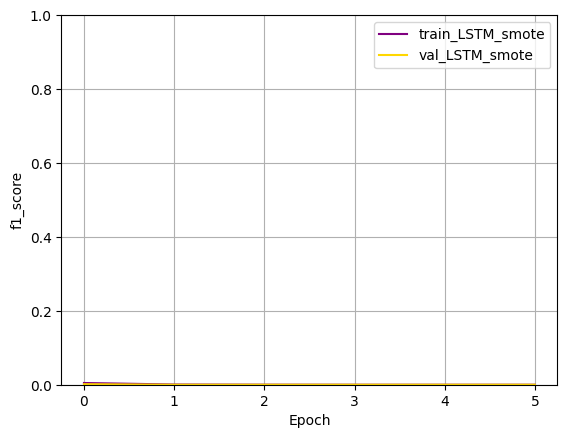

Optimizer : Adam


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 287, 64)           16896     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dense_115 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
838/838 [==============================] - 163s 193ms/step - loss: 1.3941 - accuracy: 0.2538 - f1_score: 0.0015 - val_loss: 1.3878 - val_accuracy: 0.2571 - val_f1_score: 0.0000e+00
Epoch 2/20
838/838 [==============================] - 162s 193ms/step - loss: 1.3885 - accuracy: 

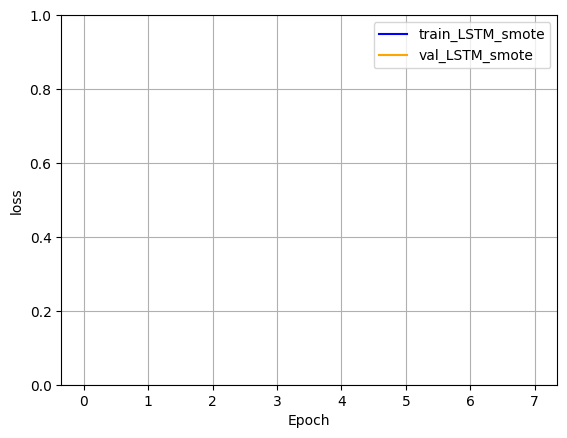

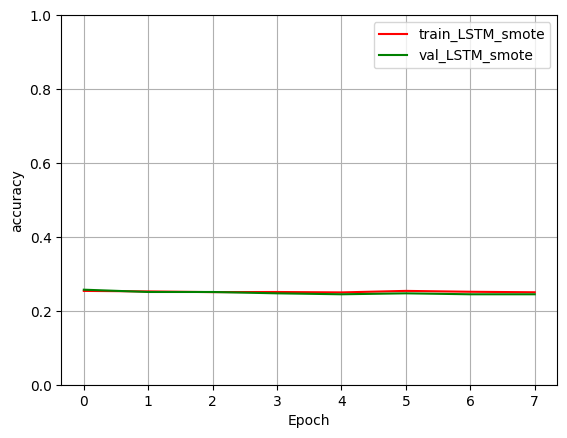

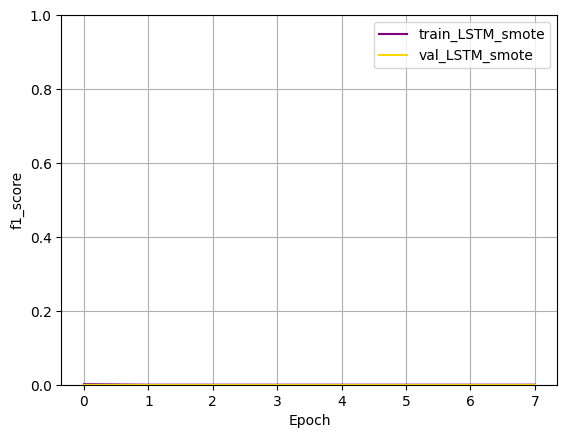









Execute model: Conv


Version of X: mv_base


Dimension of X:  (40427, 143)


Lenght of y:  40427


Optimizer : Adam_clipping


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_196 (Conv1D)         (None, 72, 64)            256       
                                                                 
 conv1d_197 (Conv1D)         (None, 36, 64)            12352     
                                                                 
 max_pooling1d_98 (MaxPoolin  (None, 18, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_198 (Conv1D)         (None, 9, 128)            24704     
                                                                 
 conv1d_199 (Conv1D)         (None, 5, 128)            49280     
                                                 

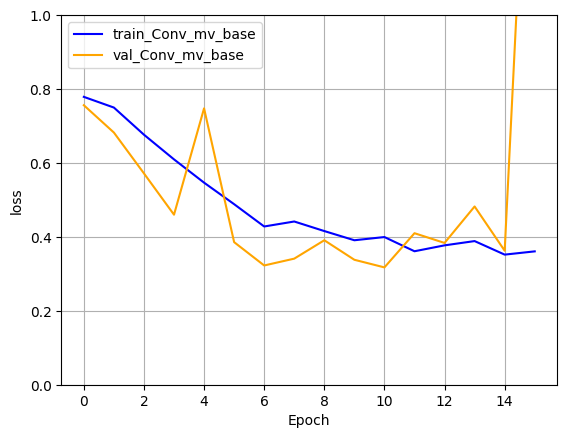

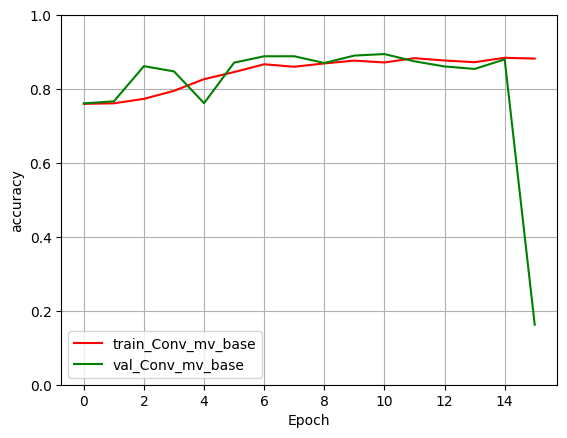

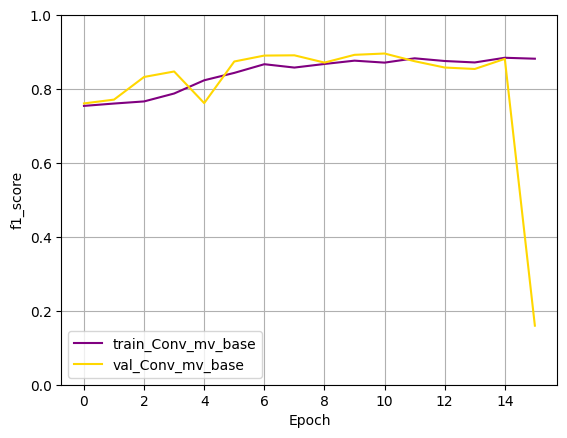

Optimizer : Adam


Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_200 (Conv1D)         (None, 72, 64)            256       
                                                                 
 conv1d_201 (Conv1D)         (None, 36, 64)            12352     
                                                                 
 max_pooling1d_100 (MaxPooli  (None, 18, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_202 (Conv1D)         (None, 9, 128)            24704     
                                                                 
 conv1d_203 (Conv1D)         (None, 5, 128)            49280     
                                                                 
 max_pooling1d_101 (MaxPooli  (None, 2, 128)           0         
 ng1D)                            

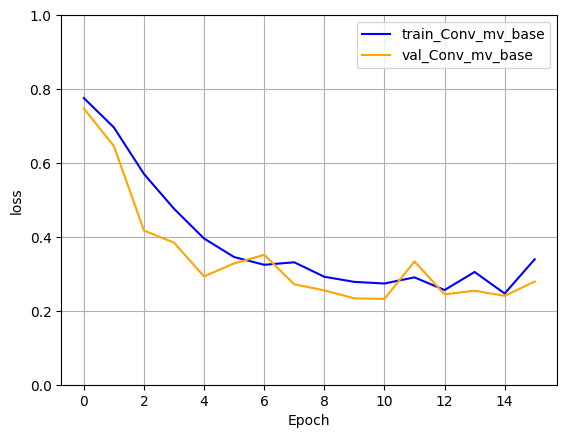

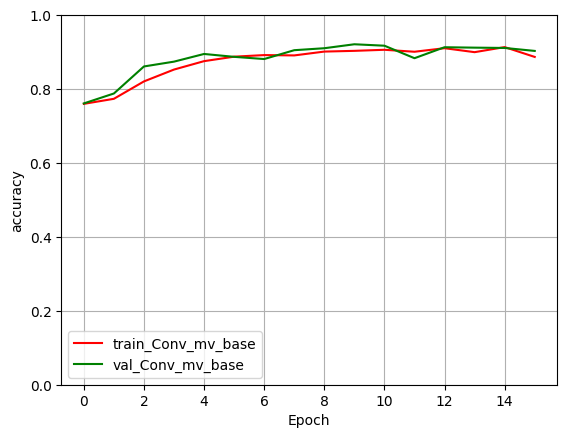

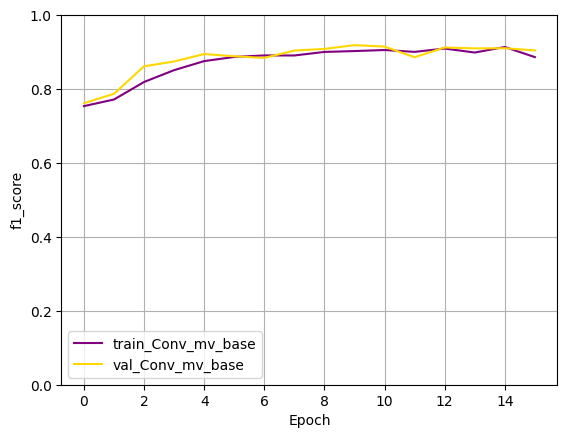









Execute model: LSTM


Version of X: mv_base


Dimension of X:  (40427, 143)


Lenght of y:  40427


Optimizer : Adam_clipping


Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 143, 64)           16896     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dense_120 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1693/1693 [==============================] - 169s 99ms/step - loss: 0.7617 - accuracy: 0.7597 - f1_score: 0.7583 - val_loss: 0.7580 - val_accuracy: 0.7611 - val_

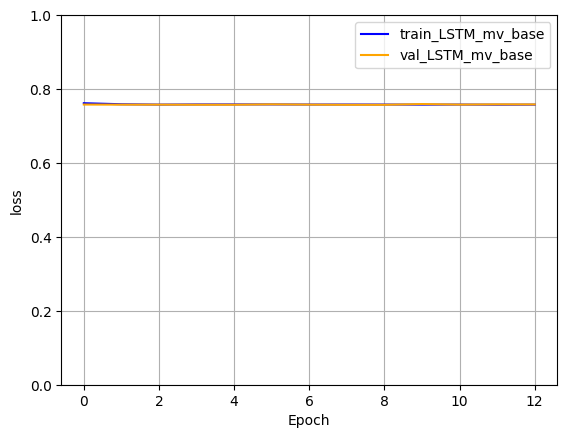

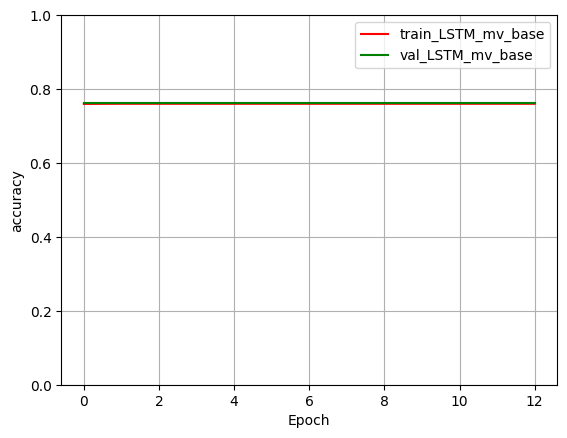

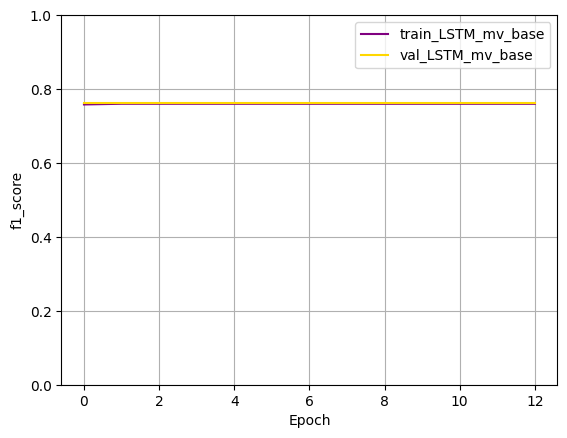

Optimizer : Adam


Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 143, 64)           16896     
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dense_121 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1693/1693 [==============================] - 171s 100ms/step - loss: 0.7619 - accuracy: 0.7598 - f1_score: 0.7578 - val_loss: 0.7584 - val_accuracy: 0.7611 - val_f1_score: 0.7611
Epoch 2/20
1693/1693 [==============================] - 168s 99ms/step - loss: 0.7584 - accuracy: 0

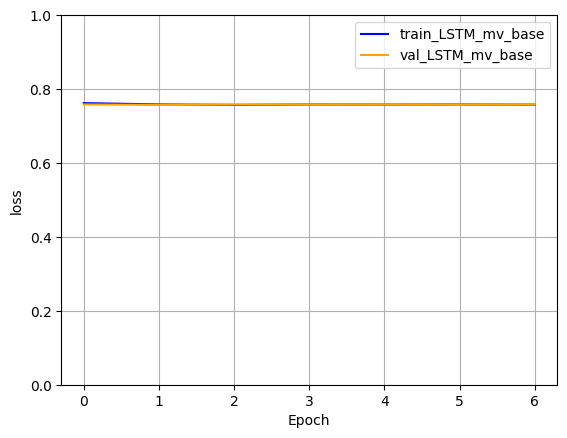

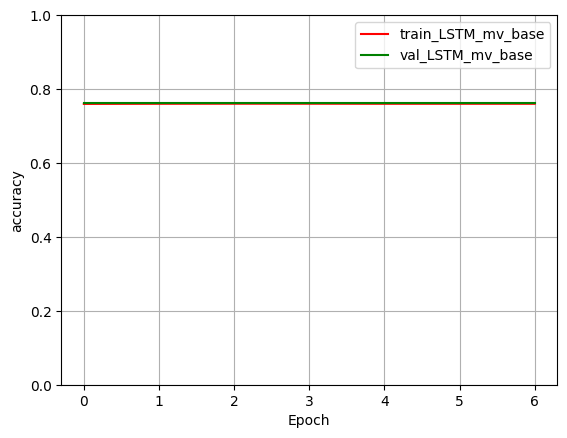

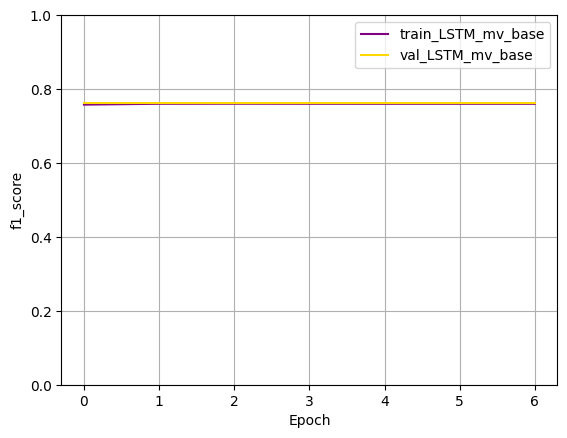









Execute model: Conv


Version of X: mv_smote


Dimension of X:  (20000, 143)


Lenght of y:  20000


Optimizer : Adam_clipping


Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_204 (Conv1D)         (None, 72, 64)            256       
                                                                 
 conv1d_205 (Conv1D)         (None, 36, 64)            12352     
                                                                 
 max_pooling1d_102 (MaxPooli  (None, 18, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_206 (Conv1D)         (None, 9, 128)            24704     
                                                                 
 conv1d_207 (Conv1D)         (None, 5, 128)            49280     
                                                

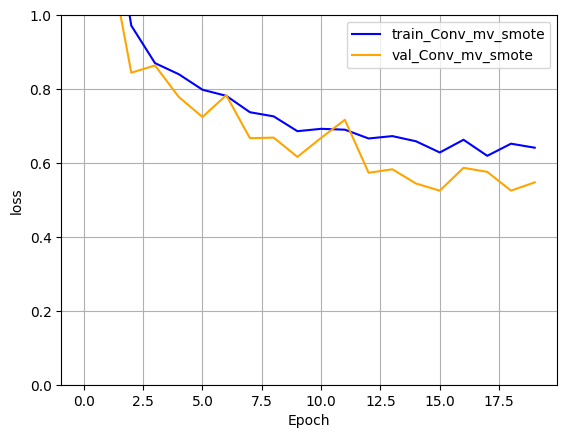

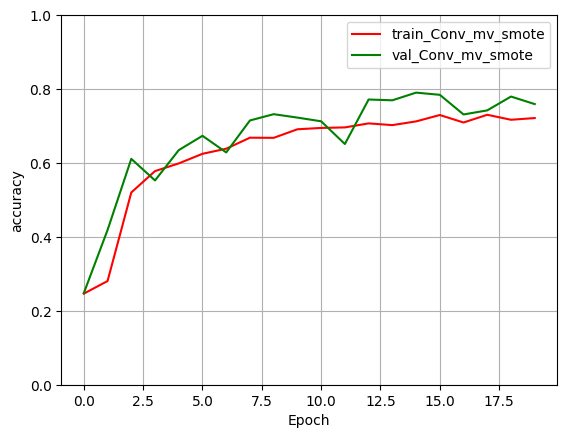

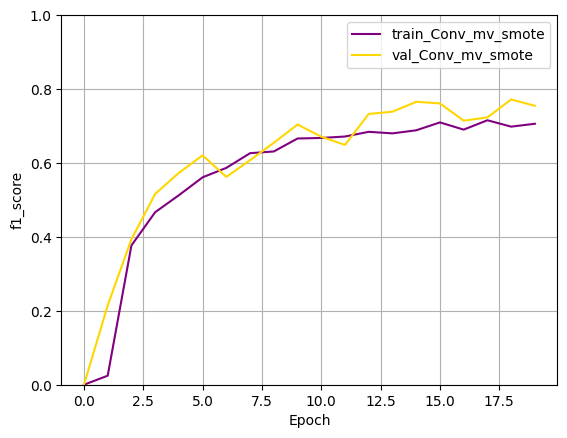

Optimizer : Adam


Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_208 (Conv1D)         (None, 72, 64)            256       
                                                                 
 conv1d_209 (Conv1D)         (None, 36, 64)            12352     
                                                                 
 max_pooling1d_104 (MaxPooli  (None, 18, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_210 (Conv1D)         (None, 9, 128)            24704     
                                                                 
 conv1d_211 (Conv1D)         (None, 5, 128)            49280     
                                                                 
 max_pooling1d_105 (MaxPooli  (None, 2, 128)           0         
 ng1D)                            

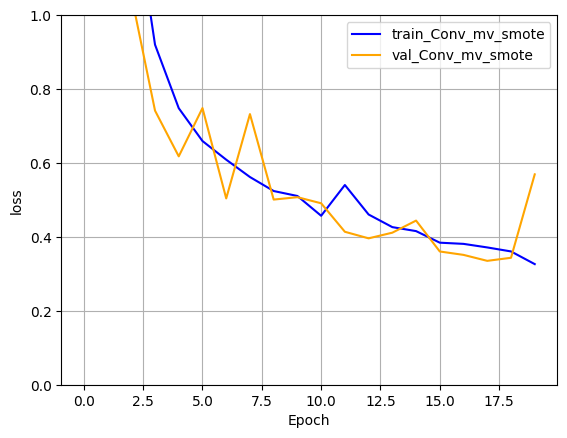

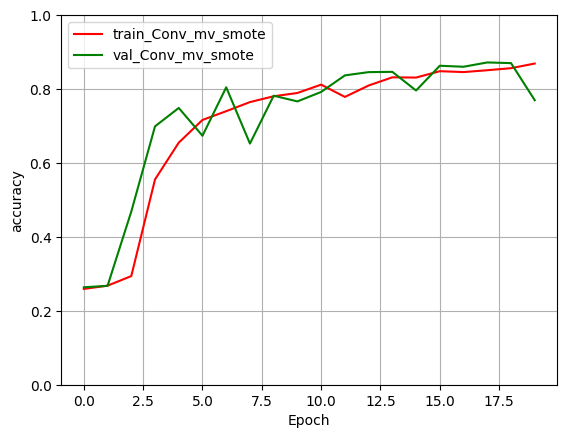

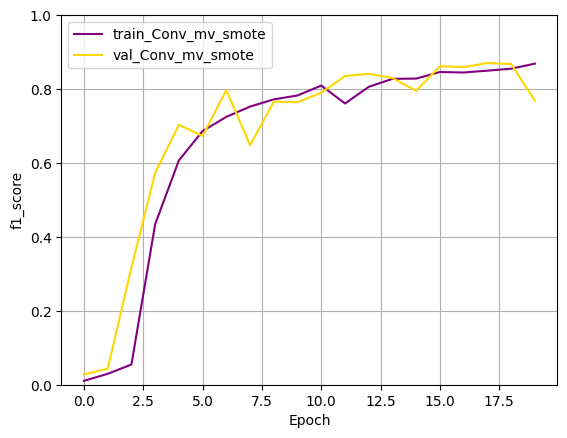









Execute model: LSTM


Version of X: mv_smote


Dimension of X:  (20000, 143)


Lenght of y:  20000


Optimizer : Adam_clipping


Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 143, 64)           16896     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dense_126 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
838/838 [==============================] - 85s 100ms/step - loss: 1.3831 - accuracy: 0.2672 - f1_score: 0.0044 - val_loss: 1.3683 - val_accuracy: 0.2541 - val_f

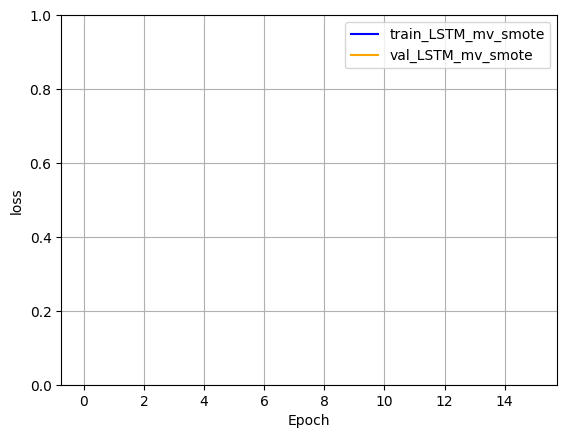

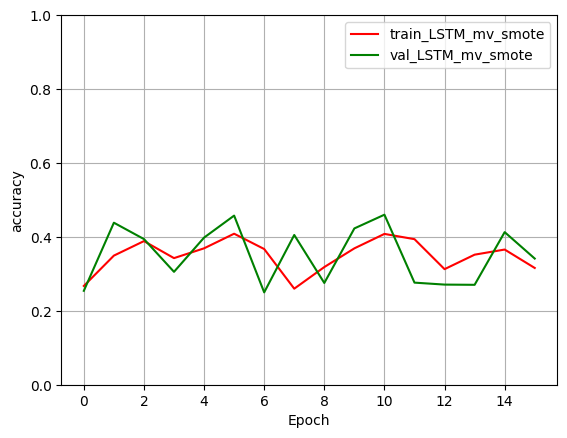

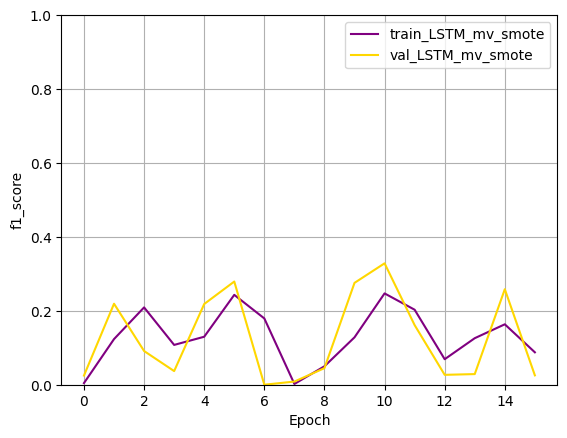

Optimizer : Adam


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 143, 64)           16896     
                                                                 
 lstm_43 (LSTM)              (None, 32)                12416     
                                                                 
 dense_127 (Dense)           (None, 4)                 132       
                                                                 
Total params: 29,444
Trainable params: 29,444
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
838/838 [==============================] - 85s 100ms/step - loss: 1.3793 - accuracy: 0.2728 - f1_score: 0.0062 - val_loss: 1.3372 - val_accuracy: 0.3288 - val_f1_score: 0.0418
Epoch 2/20
838/838 [==============================] - 83s 99ms/step - loss: 1.2761 - accuracy: 0.3656 

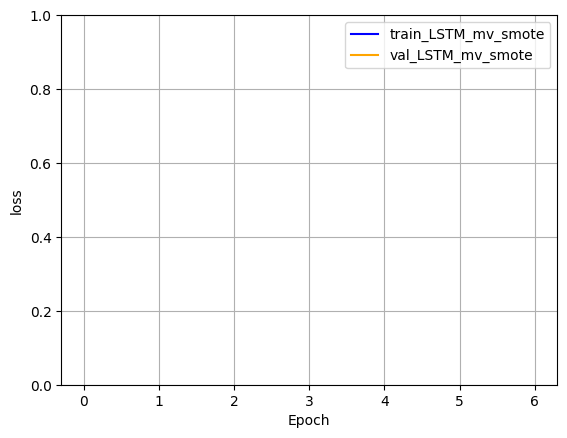

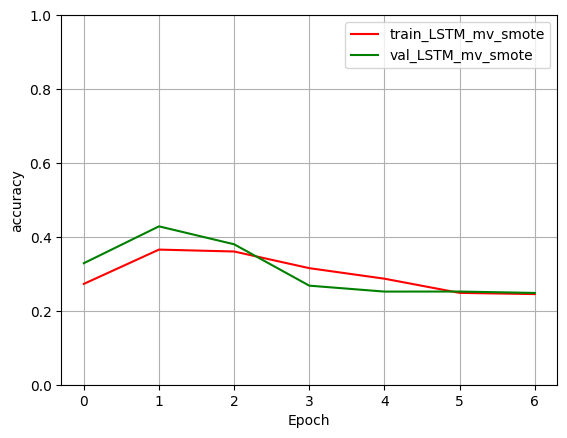

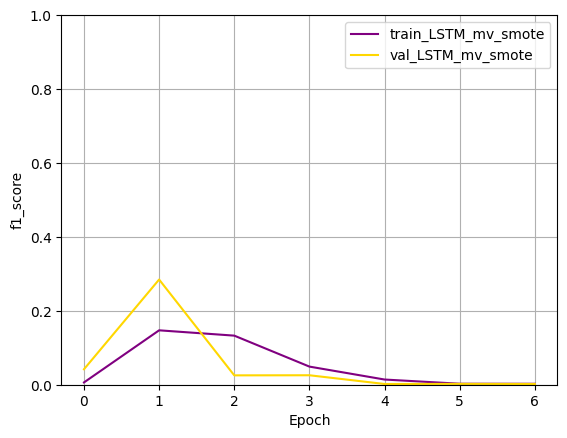

In [ ]:

cont = 0
#for X in list_X:
for k in dict_data:

  X,y = dict_data[k]

  # 1-hot-enconding labels

  y = pd.get_dummies(y)

  #train test
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42, shuffle=True)

  # parameters to train
  nb_classes = 4
  input_shape = len(X.iloc[1,:])
  models = {
              0:"Conv",
              1:"LSTM"}
  dpt_model_history = []
  metrics = ["accuracy",f1_score]
  #optimizers = {"SGD_momentum_clipping" : keras.optimizers.SGD(lr=0.002, momentum=0.0, clipvalue=7.0),"Adam" : keras.optimizers.Adam() }
  optimizers = {"Adam_clipping" : keras.optimizers.Adam(clipvalue=0.2) ,"Adam" : keras.optimizers.Adam() }
  # param to print
  metrics_name = {"loss": ("blue","orange"),"accuracy":("red","green"),"f1_score":("purple","gold")}
  #https://matplotlib.org/stable/gallery/color/named_colors.html

  #model = modelConv()
  for i in range(len(models)) :

      print("\n\n\n\n\n\n\n")
      print("Execute model: "+models[i])
      print("\n")
      print("Version of X: "+k)
      print("\n")
      print("Dimension of X: ", X.shape)
      print("\n")
      print("Lenght of y: ", len(y))
      print("\n")

      for optimizer in optimizers :
          print("Optimizer : "+optimizer)
          print("\n")

          model = create_model(input_shape,nb_classes,models[i],metrics, optimizers[optimizer])
          print(model.summary())

          callbacks =[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]#patience in n° of epochs with no improvement

          current_history = model.fit(x_train, y_train,
                                            epochs=20,
                                            batch_size=16,
                                            validation_data=(x_test, y_test),
                                            callbacks=callbacks,
                                            verbose=1)
          dpt_model_history.append(current_history)
          #plot_loss(current_history, models[i], k)
          path_dir_plot = '/home/nicola/Documenti/DeepLearning/wplots/'+'p'+str(cont)+"/"
          os.mkdir(path_dir_plot)
          for metric in metrics_name:
            c1,c2 = metrics_name[metric]
            plot_metric(current_history,metric, models[i], k,optimizer, c1,c2,path_dir_plot)
          cont = cont +1

In [ ]:
dpt_model_history[0].history

{'loss': [0.774377167224884,
  0.7286133170127869,
  0.5167319774627686,
  0.35197749733924866,
  0.30076125264167786,
  0.30027103424072266,
  0.26591968536376953,
  0.28610938787460327,
  0.24854840338230133,
  0.27213555574417114,
  0.34210914373397827,
  0.2504366934299469,
  0.23750150203704834,
  0.2284037172794342,
  0.2213144749403,
  0.220112144947052,
  0.2058059722185135,
  0.2002740502357483,
  0.19684502482414246,
  0.2247675657272339],
 'accuracy': [0.759949803352356,
  0.7648600935935974,
  0.8323488235473633,
  0.8819316029548645,
  0.8965517282485962,
  0.8954071998596191,
  0.9068891406059265,
  0.9011297225952148,
  0.9139407873153687,
  0.9080336689949036,
  0.8851805329322815,
  0.9121317267417908,
  0.9140515327453613,
  0.9202539920806885,
  0.9221000075340271,
  0.9236875176429749,
  0.9259026646614075,
  0.928708553314209,
  0.9295207858085632,
  0.920660138130188],
 'f1_score': [0.7546847462654114,
  0.7643832564353943,
  0.8299381732940674,
  0.88222008943557